In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

#DATA LOADING

In [ ]:
data=pd.read_csv("/content/StudentsPerformance.csv")

#DATA EXPLORING

In [ ]:
data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

In [ ]:
data["lunch"].count()

1000

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,Average Grade,reading grade,writing grade,math grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B+,B+,A,B+
1,female,group C,some college,standard,completed,69,90,88,82.333333,A+,A+,A+,B+
2,female,group B,master's degree,standard,none,90,95,93,92.666667,O,O,O,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,C,B,C+,C
4,male,group C,some college,standard,none,76,78,75,76.333333,A,A,A,A


In [ ]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [ ]:
data.groupby('race/ethnicity').count()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
race/ethnicity,,,,,,,,
group A,89,89,89,89,89,89,89,89
group B,190,190,190,190,190,190,190,190
group C,319,319,319,319,319,319,319,319
group D,262,262,262,262,262,262,262,262
group E,140,140,140,140,140,140,140,140


In [ ]:
data.groupby('parental level of education').count()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,average score
parental level of education,,,,,,,,
associate's degree,222,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179,179


In [ ]:
data.groupby('lunch').count()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average score
lunch,,,,,,,,
free/reduced,355,355,355,355,355,355,355,355
standard,645,645,645,645,645,645,645,645


In [ ]:
data.groupby('test preparation course').count()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,average score
test preparation course,,,,,,,,
completed,358,358,358,358,358,358,358,358
none,642,642,642,642,642,642,642,642


In [ ]:
data.describe()

,math score,reading score,writing score,average score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [ ]:
data.groupby('test preparation course').count()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,average score
test preparation course,,,,,,,,
completed,358,358,358,358,358,358,358,358
none,642,642,642,642,642,642,642,642


#SIMPLE DATA VISUALIZATION

##Gender Proportion

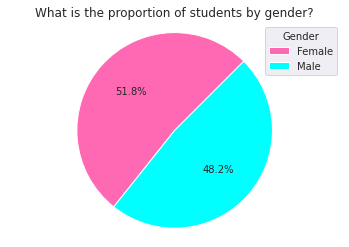

In [ ]:
gender_counts = data["gender"].value_counts()
ax = gender_counts.plot(kind='pie',
             autopct='%.1f%%', 
             startangle=45,
             labels=None,
             colors=['#FF69B4', '#00FFFF'])
ax.patch.set_facecolor('white')
plt.title('What is the proportion of students by gender?')
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["Female", "Male"], loc="upper right", title="Gender");

##Students v/s Race/Ethnicity

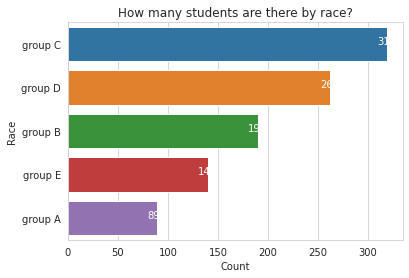

In [ ]:
race_value_counts = data['race/ethnicity'].value_counts()
ax = sns.barplot(x=race_value_counts.values, y=race_value_counts.index, orient='h')
ax.set_title("How many students are there by race?")
ax.set_xlabel(xlabel="Count")
ax.set_ylabel(ylabel="Race")

for index, value in enumerate(race_value_counts): 
    plt.annotate(value, xy=(value-10, index), color='white') 

##Parent's Education Level

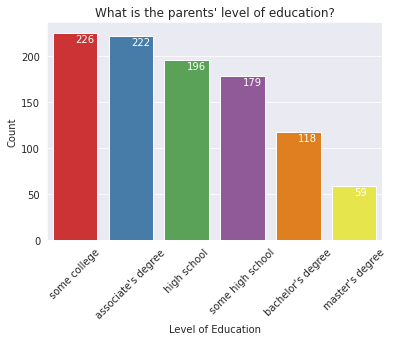

In [ ]:
level_education_value_counts = data['parental level of education'].value_counts()
ax = sns.barplot(x=level_education_value_counts.index, y=level_education_value_counts.values,palette = "Set1")
ax.set_title("What is the parents' level of education?")
ax.set_xlabel(xlabel="Level of Education")
ax.set_ylabel(ylabel="Count")
plt.xticks(rotation = 45)

for index, value in enumerate(level_education_value_counts): 
    plt.annotate(value, xy=(index, value-10), color='white') 

##Parent's Education Level with grouped by their Race/Ethnicity

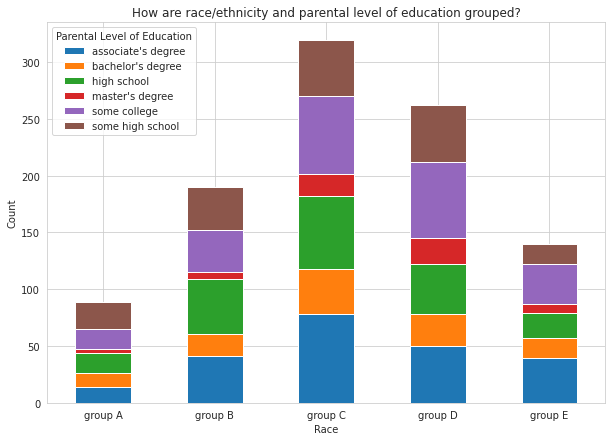

In [ ]:
ax = pd.crosstab(data["race/ethnicity"], [data["parental level of education"]]).plot.bar(stacked=True, figsize=(10,7))
ax.set_title("How are race/ethnicity and parental level of education grouped?")
ax.set_xlabel(xlabel="Race")
ax.set_ylabel(ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc="upper left", title="Parental Level of Education");

##Lunch Status

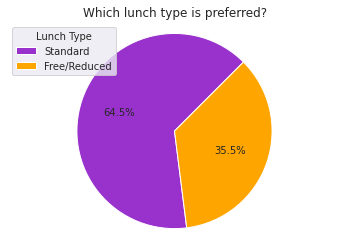

In [ ]:
lunch_counts = data["lunch"].value_counts()
ax = lunch_counts.plot(kind='pie',
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,
             colors=['#9932CC', '#FFA500'])
ax.patch.set_facecolor('white')
plt.title('Which lunch type is preferred?')
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["Standard", "Free/Reduced"], title="Lunch Type");

##Test Preparation Course

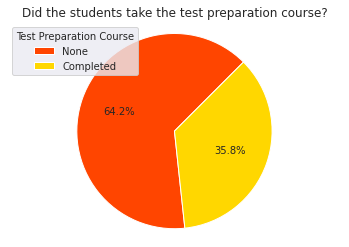

In [ ]:
test_preparation_counts = data["test preparation course"].value_counts()
ax = test_preparation_counts.plot(kind='pie',
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,
             colors=['#FF4500', '#FFD700'])
ax.patch.set_facecolor('white')
plt.title('Did the students take the test preparation course?')
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["None", "Completed"], title="Test Preparation Course");

#Advance Visualization

#Was test preparation useful in helping students achieve good grades?

In [ ]:
groups = data.groupby(['gender', 'test preparation course']).size().reset_index(name="Count")
print(groups)

   gender test preparation course  Count
0  female               completed    184
1  female                    none    334
2    male               completed    174
3    male                    none    308


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


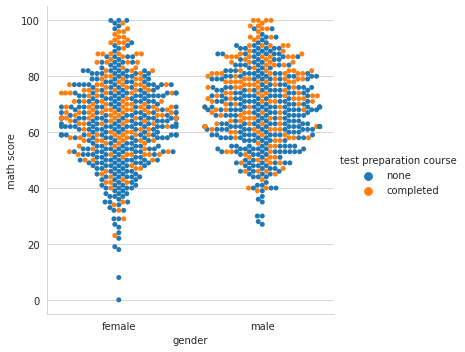

In [ ]:
sns.catplot(x = 'gender', y = 'math score', data = data,kind = 'swarm',hue = 'test preparation course')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


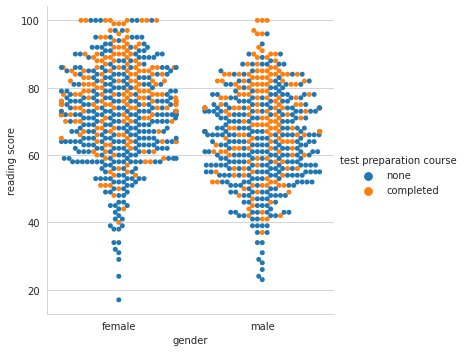

In [ ]:
sns.catplot(x = 'gender', y = 'reading score', data = data,kind = 'swarm',hue = 'test preparation course')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


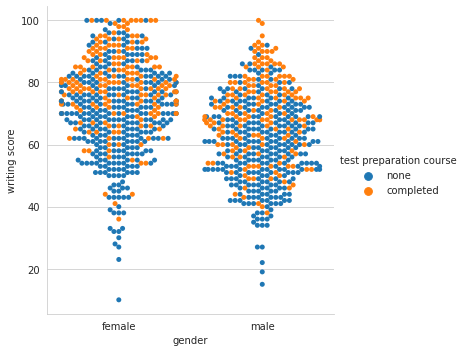

In [ ]:

sns.catplot(x = 'gender', y = 'writing score', data = data,kind = 'swarm',hue = 'test preparation course')

plt.show()

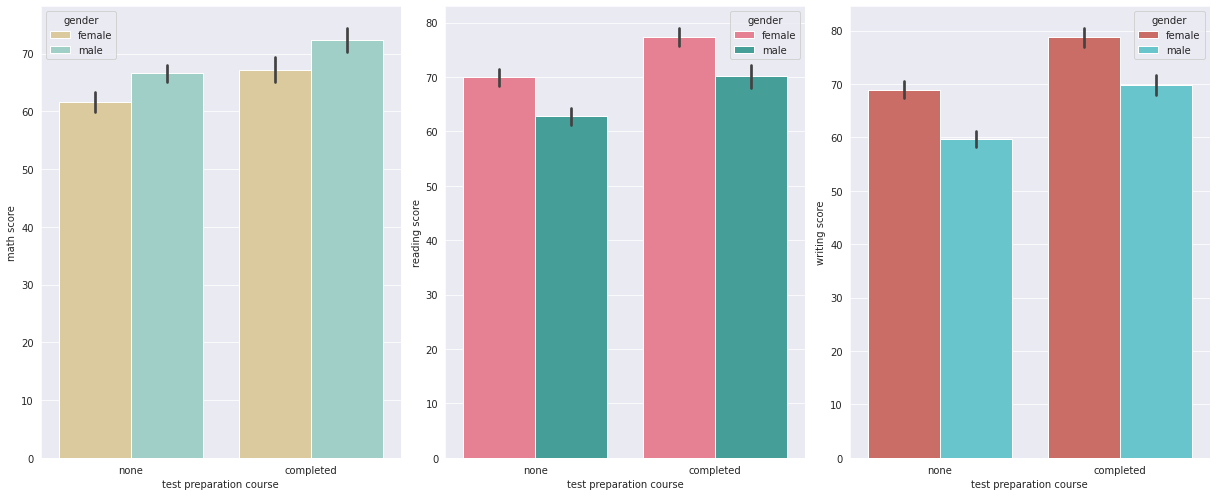

In [ ]:
plt.figure(figsize=(17,7))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'math score',hue = 'gender', data = data,palette = "BrBG")

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = data,palette = "husl")

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = data,palette = "hls")

plt.tight_layout()

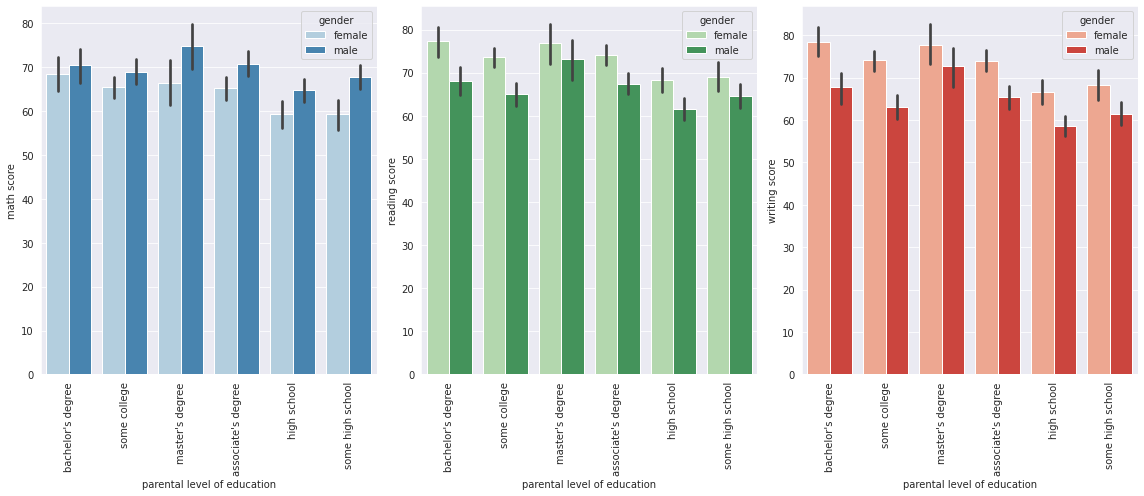

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
sns.barplot(x = 'parental level of education', y = 'math score',hue = 'gender', data = data,palette = "Blues")
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'parental level of education', y = 'reading score', hue = 'gender',data = data,palette = "Greens")
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'parental level of education', y = 'writing score', hue = 'gender',data = data,palette = "Reds")
plt.xticks(rotation = 90)

plt.tight_layout()

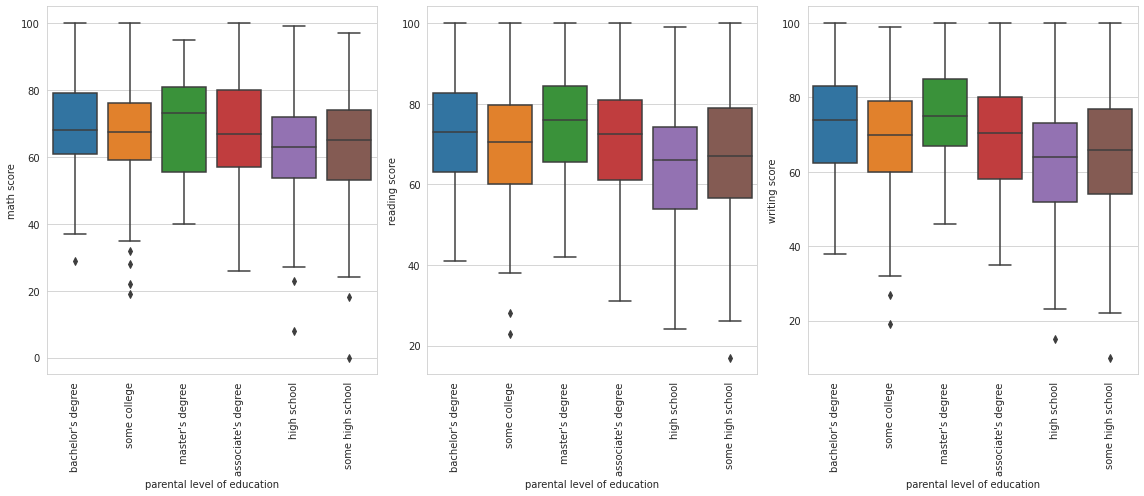

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
sns.boxplot(x ='parental level of education' , y = 'math score', data = data)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.boxplot(x ='parental level of education' , y = 'reading score', data = data)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.boxplot(x ='parental level of education' , y = 'writing score', data = data)
plt.xticks(rotation = 90)

plt.tight_layout()

In [ ]:
data.groupby("race/ethnicity")["parental level of education"].describe()

,count,unique,top,freq
race/ethnicity,,,,
group A,89,6,some high school,24
group B,190,6,high school,48
group C,319,6,associate's degree,78
group D,262,6,some college,67
group E,140,6,associate's degree,39


In [ ]:
data.groupby("race/ethnicity")["Average Grade"].describe()

,count,unique,top,freq
race/ethnicity,,,,
group A,89,8,C,21
group B,190,8,B+,41
group C,319,8,B+,86
group D,262,8,B+,73
group E,140,8,B+,36


In [ ]:
data.groupby("race/ethnicity")["test preparation course"].describe()

,count,unique,top,freq
race/ethnicity,,,,
group A,89,2,none,58
group B,190,2,none,122
group C,319,2,none,202
group D,262,2,none,180
group E,140,2,none,80


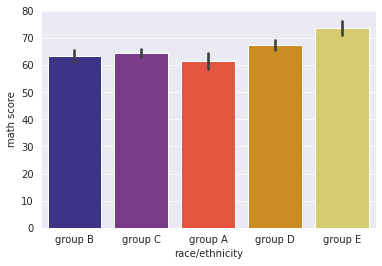

In [ ]:
sns.barplot(x='race/ethnicity',y='math score',data=data,palette="CMRmap");

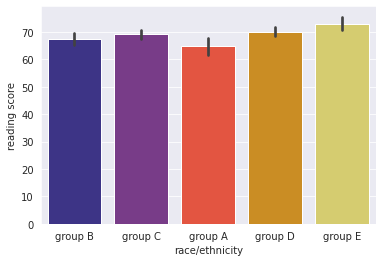

In [ ]:
sns.barplot(x='race/ethnicity',y='reading score',data=data,palette="CMRmap");

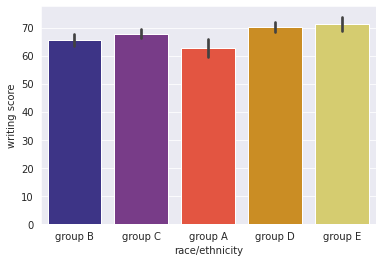

In [ ]:
sns.barplot(x='race/ethnicity',y='writing score',data=data,palette="CMRmap");

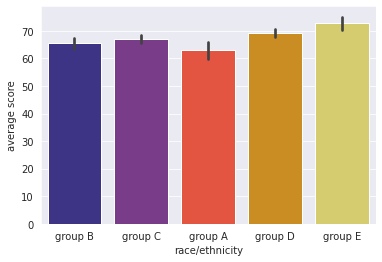

In [ ]:
sns.barplot(x='race/ethnicity',y='average score',data=data,palette="CMRmap");

In [ ]:
def AvgGrade(AverageScore):
    if AverageScore >= 91:
        return 'O'
    elif AverageScore >= 82 and AverageScore < 91:
        return 'A+'
    elif AverageScore >=73 and AverageScore < 82:
        return 'A'
    elif AverageScore >=64 and AverageScore < 73:
        return 'B+'
    elif AverageScore >= 55 and AverageScore < 64:
        return 'B'
    elif AverageScore >=46 and AverageScore < 55:
        return 'C'
    elif AverageScore >= 35 and AverageScore < 46:
        return 'C+'
    elif AverageScore < 35:
        return 'F'
    


In [ ]:
data["Average Grade"] = data.apply(lambda x : AvgGrade(x["average score"]), axis=1)

In [ ]:
def get_grade(marks):
    if marks >= 91:
        return 'O'
    elif marks >= 82 and marks < 91:
        return 'A+'
    elif marks >=73 and marks < 82:
        return 'A'
    elif marks >=64 and marks < 73:
        return 'B+'
    elif marks >= 55 and marks < 64:
        return 'B'
    elif marks >=46 and marks < 55:
        return 'C'
    elif marks >= 35 and marks < 46:
        return 'C+'
    elif marks < 35:
        return 'F'

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,Average Grade,reading grade,writing grade,math grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B+,B+,A,B+
1,female,group C,some college,standard,completed,69,90,88,82.333333,A+,A+,A+,B+
2,female,group B,master's degree,standard,none,90,95,93,92.666667,O,O,O,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,C,B,C+,C
4,male,group C,some college,standard,none,76,78,75,76.333333,A,A,A,A


In [ ]:
data['reading grade'] = data['reading score'].apply(get_grade)
data['writing grade'] = data['writing score'].apply(get_grade)
data['math grade'] = data['math score'].apply(get_grade)

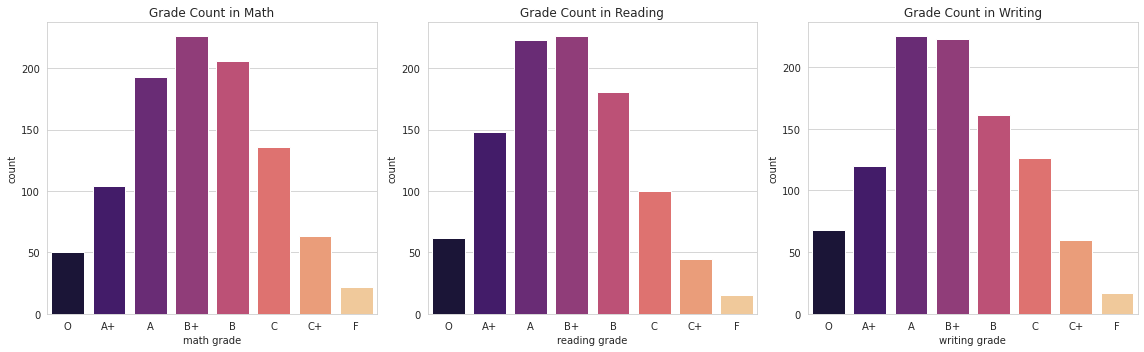

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(x ='math grade', data = data,order = ['O','A+','A','B+','B','C','C+','F'],palette='magma')
plt.title('Grade Count in Math')


plt.subplot(1,3,2)
sns.countplot(x ='reading grade', data = data,order = ['O','A+','A','B+','B','C','C+','F'],palette='magma')
plt.title('Grade Count in Reading')

plt.subplot(1,3,3)
sns.countplot(x ='writing grade', data = data,order = ['O','A+','A','B+','B','C','C+','F'],palette='magma')
plt.title('Grade Count in Writing')

plt.tight_layout()

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,Average Grade,reading grade,writing grade,math grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B+,B+,A,B+
1,female,group C,some college,standard,completed,69,90,88,82.333333,A+,A+,A+,B+
2,female,group B,master's degree,standard,none,90,95,93,92.666667,O,O,O,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,C,B,C+,C
4,male,group C,some college,standard,none,76,78,75,76.333333,A,A,A,A


In [ ]:
data['reading grade'].value_counts().index

Index(['B+', 'A', 'B', 'A+', 'C', 'O', 'C+', 'F'], dtype='object')

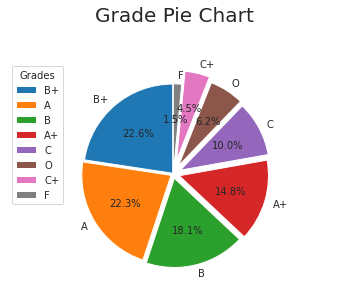

In [ ]:
labels=data['reading grade'].value_counts().index
plt.pie(data['reading grade'].value_counts().values,labels=labels,explode=[0.01,0.03,0.05,0.07,0.09,0.11,0.16,0.01],
        autopct='%1.1f%%', startangle=90)
plt.title('Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.legend(loc="upper left", labels=labels, title="Grades");
plt.show()

##Which gender did better?

In [ ]:
def plot_sunburst_chart(subject):
    plt.figure(figsize=(10,7))
    grade_counts = pd.crosstab(data[f"{subject}"], data["gender"])
    totals_labels = grade_counts.index
    totals = grade_counts.values.sum(axis=1)
    by_gender = grade_counts.values.flatten()
    by_gender_labels = len(grade_counts) * ["F", "M"]

    by_gender_colors = len(grade_counts) * ['#FF1493', '#000080']
    explode = (0.3,0.3,0.3,0.3,0.3) 

    plt.pie(totals, 
            labels=totals_labels,
            autopct='%1.1f%%', 
            pctdistance=1.1,
            labeldistance=0.8,
            startangle=180,
            textprops={'fontsize': 10},
            radius=12)
    plt.pie(by_gender,
            labels=by_gender_labels,
            colors=by_gender_colors,
            autopct='%1.1f%%', 
            pctdistance=1.15,
            labeldistance=0.8,
            startangle=180,
            textprops={'fontsize': 10, 'color': 'white'},
            radius=7)

    centre_circle = plt.Circle((0,0), 5, color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title(f'Which gender did better at {subject}?', fontsize=20)

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

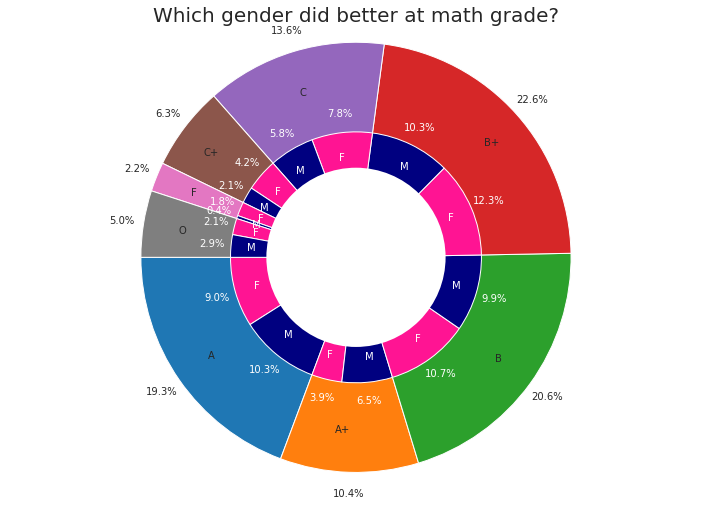

In [ ]:
plot_sunburst_chart("math grade")

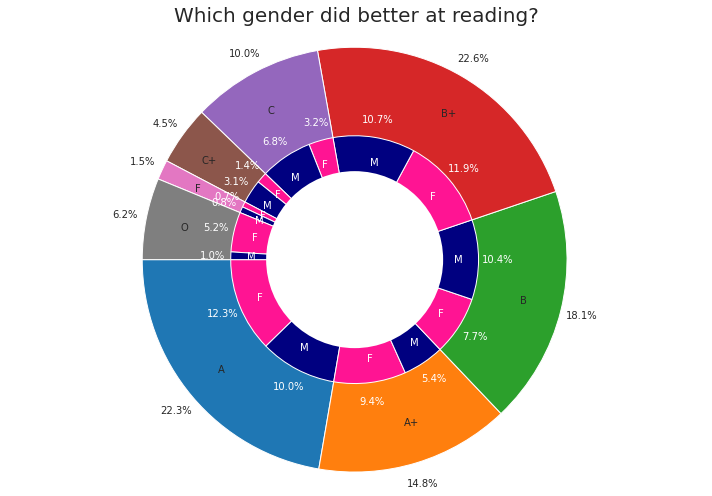

In [ ]:
plot_sunburst_chart("reading")

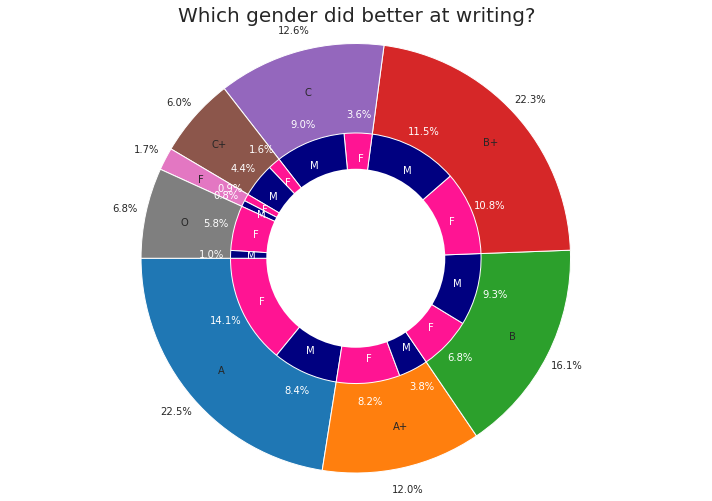

In [ ]:
plot_sunburst_chart("writing")

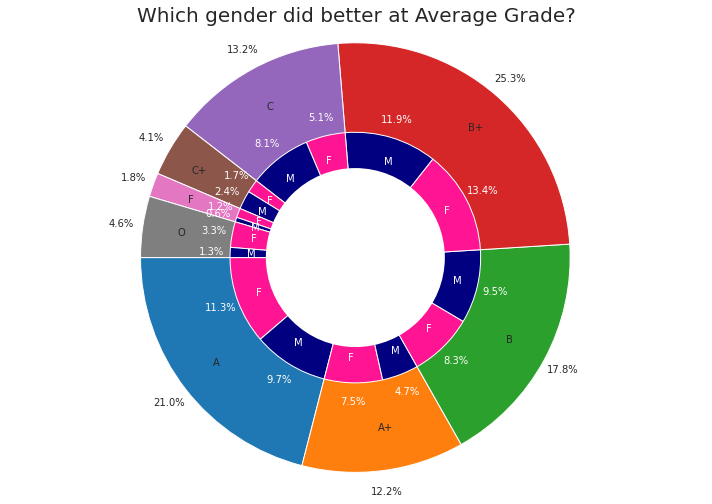

In [ ]:
plot_sunburst_chart("Average Grade")

##Does Lunch affect Studnets Scores?

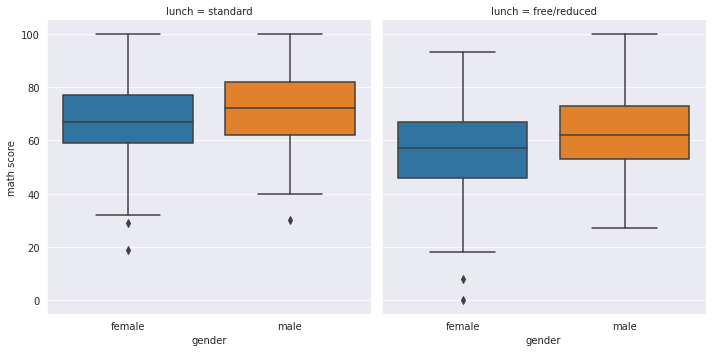

In [ ]:
sns.catplot(x='gender',y='math score',data=data,kind='box',col='lunch')
plt.show()

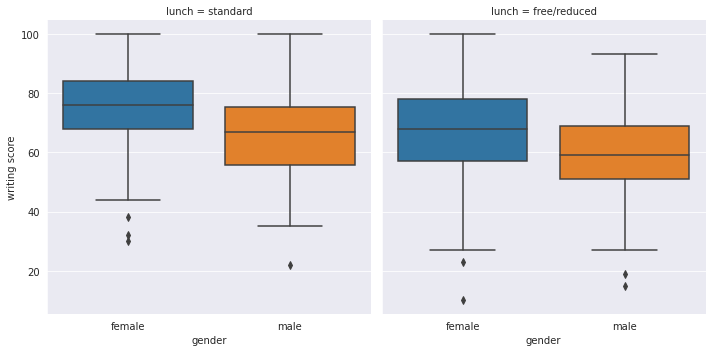

In [ ]:
sns.catplot(x='gender',y='writing score',data=data,kind='box',col='lunch')
plt.show()

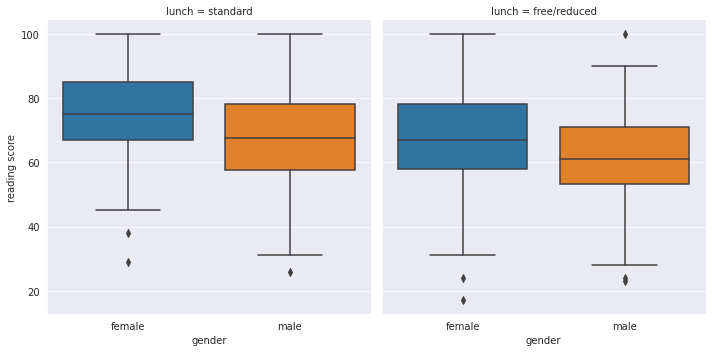

In [ ]:
sns.catplot(x='gender',y='reading score',data=data,kind='box',col='lunch')
plt.show()

#Conclusionds

##1) Female are ahead of male in reading and writing scores, but in math scores male is higher than female irrespective of test preparation.However, I think this difference is not a big deal.
##2) Having Lunch  is important, hence if we look closely when lunch is provided scores are comparatively higher than  when lunch is absent.
##3) Math, Reading, Writing score is found to be more in race/ethnicity group E and lowest in race/ethnicity group A.
##4) Math, Reading, Writing scores is found to be more where parental level of education is master's degree and lowest where parental level of high school.